In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:

def elastic_pendulum(R,phi,v,w):

    k = 44
    m = 1
    L_i = 1
    g = 9.81
    
    # returns in order R , phi, velocity, angluar velocity

    R_func =  v

    phi_func = w

    v_func = R*(w**2) - (k/m)*(R - L_i) + g*(np.cos(phi)) 

    w_func = (-g/R)*(np.sin(phi)) - 2*v*w 

    return R_func , phi_func, v_func, w_func


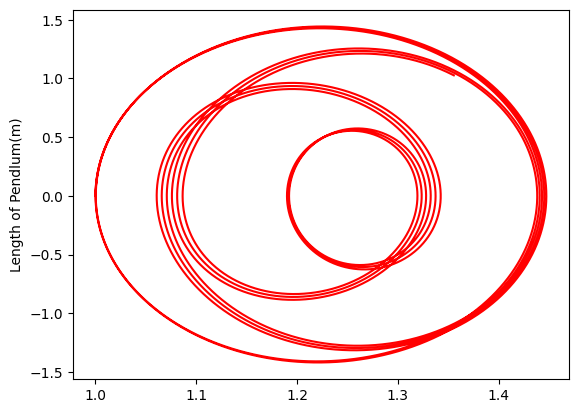

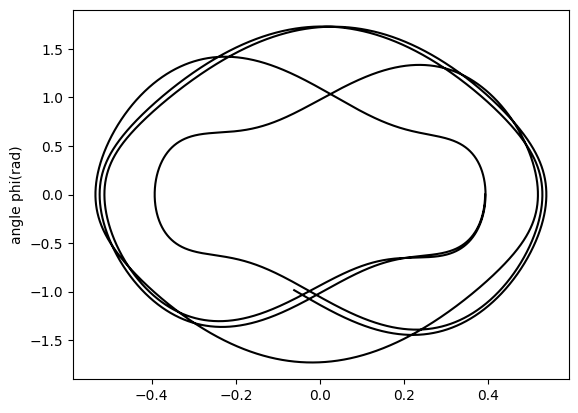

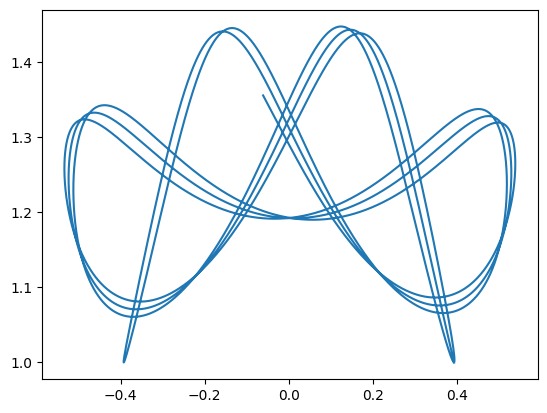

In [18]:
#RK4 for elastic pendulum
pi = np.pi

R_list = []
phi_list = []
v_list = []
w_list = []
t_list = []

t_old = 0
R_old = 1
phi_old = pi/8
v_old = 0
w_old = 0

delta_t = 0.0005
wanted_t = 10 #in SI units of system itself (sec)
num_of_iter = int(wanted_t/delta_t)

for a in range (num_of_iter):
    
    R_1, phi_1, v_1, w_1 = elastic_pendulum(R_old, phi_old, v_old, w_old)
    
    R_2, phi_2, v_2, w_2 = elastic_pendulum(R_old + (delta_t/2)*R_1, phi_old + (delta_t/2)*phi_1,v_old + (delta_t/2)*v_1, w_old + (delta_t/2)*w_1)

    R_3, phi_3, v_3, w_3 = elastic_pendulum(R_old + (delta_t/2)*R_2, phi_old + (delta_t/2)*phi_2,v_old + (delta_t/2)*v_2, w_old + (delta_t/2)*w_2)

    R_4, phi_4, v_4, w_4 = elastic_pendulum(R_old + (delta_t)*R_3, phi_old + (delta_t)*phi_3,v_old + (delta_t)*v_3, w_old + (delta_t)*w_3)

    R_new = R_old + (delta_t/6)*(R_1 + 2*R_2 + 2*R_3 + R_4)
    phi_new = phi_old + (delta_t/6)*(phi_1 + 2*phi_2 + 2*phi_3 + phi_4)
    v_new = v_old + (delta_t/6)*(v_1 + 2*v_2 + 2*v_3 + v_4)
    w_new = w_old + (delta_t/6)*(w_1 + 2*w_2 + 2*w_3 + w_4)

    t_list.append(t_old)
    R_list.append(R_new)
    phi_list.append(phi_new)
    v_list.append(v_new)
    w_list.append(w_new)

    t_old = t_old + delta_t
    R_old = R_new
    phi_old = phi_new
    v_old = v_new
    w_old = w_new

R_array = np.array(R_list)
phi_array = np.array(phi_list)
v_array = np.array(v_list)
w_array = np.array(w_list)
t_array = np.array(t_list)

def plot():
    plt.plot(R_array, v_array, 'r')
    plt.ylabel('Length of Pendlum(m)')
    plt.show()
    plt.plot(phi_array, w_array, 'black')
    plt.ylabel('angle phi(rad)')
    plt.show()
    plt.plot(phi_array,(R_array))
    #plt.title('k = 47.5')
    plt.show()

plot()


check bifurcatoins

(20000,)
(20000,)


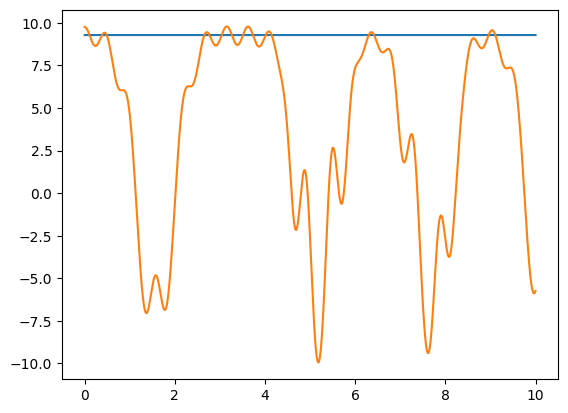

In [16]:
k = 44
m = 1
L_i = 1
g = 9.81

U_energy = 1/2*k*((R_array - L_i)**2) - m*g*R_array*(np.cos(phi_array))
K_energy = 1/2*m*(v_array**2) + 1/2*m*((R_array*w_array)**2)

Total_energy = np.abs(U_energy + K_energy)
Average_Total_Energy = [sum(Total_energy)/len(Total_energy)] * len(t_array)

print(Total_energy.shape)
print(t_array.shape)

#plt.plot(t_array, Total_energy)
plt.plot(t_array, Average_Total_Energy)
#plt.ylim(0, Average_Total_Energy[0] + 5)
plt.plot(t_array, U_energy)
plt.show()
